In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

100%|██████████| 41.0M/41.0M [00:00<00:00, 135MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1


In [3]:
df_fake = pd.read_csv(path + "/News _dataset/Fake.csv")
df_true = pd.read_csv(path + "/News _dataset/True.csv")

In [4]:
print("Fake shape:", df_fake.shape)
print("True shape:", df_true.shape)

Fake shape: (23481, 4)
True shape: (21417, 4)


In [5]:
df_true["label"] = 0
df_fake["label"] = 1

df = pd.concat([df_true, df_fake], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df.head(), df.shape)

                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date  label  
0     July 21, 2017      1  
1       May 7, 2016      1  
2  December 3, 2016      1  
3  October 6, 2017       0  
4      Apr 25, 2017      1   (44898, 5)


In [6]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of                                                    title  \
0       BREAKING: GOP Chairman Grassley Has Had Enoug...   
1       Failed GOP Candidates Remembered In Hilarious...   
2       Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3      California AG pledges to defend birth control ...   
4      AZ RANCHERS Living On US-Mexico Border Destroy...   
...                                                  ...   
44893  Nigeria says U.S. agrees delayed $593 million ...   
44894                  Boiler Room #62 – Fatal Illusions   
44895  ATHEISTS SUE GOVERNOR OF TEXAS Over Display on...   
44896  Republican tax plan would deal financial hit t...   
44897  U.N. refugee commissioner says Australia must ...   

                                                    text          subject  \
0      Donald Trump s White House is in chaos, and th...             News   
1      Now that Donald Trump is the presumptive GOP n...             News   
2      Mike Pence is a huge homophobe. He supports ex...             News   
3      SAN FRANCISCO (Reuters) - California Attorney ...     politicsNews   
4      Twisted reasoning is all that comes from Pelos...         politics   
...                                                  ...              ...   
44893  ABUJA (Reuters) - The United States has formal...        worldnews   
44894  Tune in to the Alternate Current Radio Network...      Middle-east   
44895   I m convinced the Freedom From Religion group...  Government News   
44896  WASHINGTON (Reuters) - The Republican tax plan...     politicsNews   
44897  SYDNEY (Reuters) - The U.N. High Commissioner ...        worldnews   

                     date  label  
0           July 21, 2017      1  
1             May 7, 2016      1  
2        December 3, 2016      1  
3        October 6, 2017       0  
4            Apr 25, 2017      1  
...                   ...    ...  
44893  December 27, 2017       0  
44894       June 29, 2016      1  
44895        Feb 27, 2016      1  
44896   November 2, 2017       0  
44897   November 1, 2017       0  

[44898 rows x 5 columns]>

In [8]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [9]:
df['label'].value_counts()

,count
label,
1,23481
0,21417


<Axes: xlabel='label', ylabel='count'>

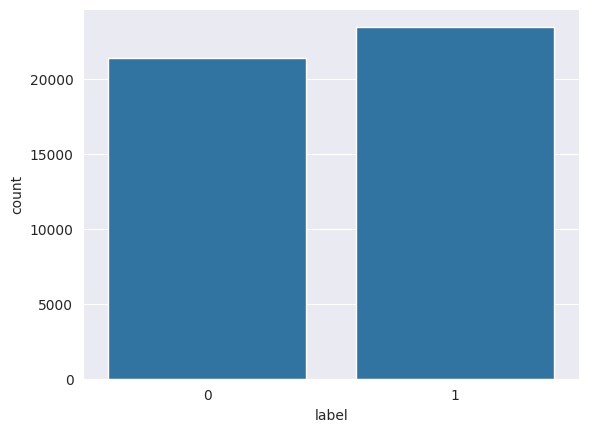

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='label',data=df)

In [11]:
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer

In [12]:
cor = []
ps = PorterStemmer()

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])  # Keep only letters
    review = df['title'][i]
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Split into words
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    cor.append(review)

In [15]:
df['cleaned_text'] = cor

In [16]:
cor[3]

'california ag pledg defend birth control insur coverag'

In [17]:
cor

['breaking: gop chairman grassley enough, demand trump jr. testimoni',
 'fail gop candid rememb hilari mock eulog (video)',
 'mike pence’ new dc neighbor hilari troll homophob bigot',
 'california ag pledg defend birth control insur coverag',
 'az rancher live us-mexico border destroy nanci pelosi’ claim trump “weak” want border wall [video]',
 'privat lawyer, trump high court pick friend busi',
 'yemeni salafist imam kill aden: sourc',
 "fbi say wit u.s. probe malaysia' 1mdb fear safeti",
 'easi read chart show berni sanders’ social step stone commun',
 'mma fighter jake shield embarrass coward mask violent 20-on-1 beat trump support [video]: “i berkeley watch man get beat mob polic help…i person jump help”',
 'tire thing go well, marco rubio make promis destroy america (video)',
 'yemen air strike kill eight women, two children, say resid',
 'breaking: wdbj killer angri black democrat…reprimand wear obama sticker work',
 'list 22 time obama call phoni climat chang seriou terror',
 'i

In [18]:
X = df['cleaned_text']
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [21]:
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)
log_pred = log_model.predict(X_test_tfidf)
print("Logistic Regression Results: ")
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Logistic Regression Results: 
Accuracy: 0.9422048997772828
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4311
           1       0.95      0.94      0.94      4669

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [22]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)
print("\nNaive Bayes Results: ")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Results: 
Accuracy: 0.9312917594654788
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4311
           1       0.92      0.94      0.93      4669

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
rf_pred = rf_model.predict(X_test_tfidf)
print("\nRandom Forest Results: ")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Results: 
Accuracy: 0.9375278396436526
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4311
           1       0.94      0.93      0.94      4669

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(title)
    plt.show()

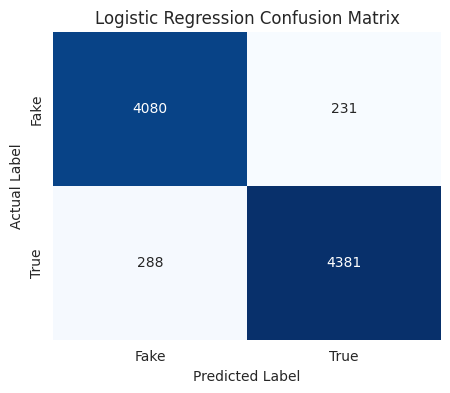

In [25]:
plot_conf_matrix(y_test, log_pred, "Logistic Regression Confusion Matrix")

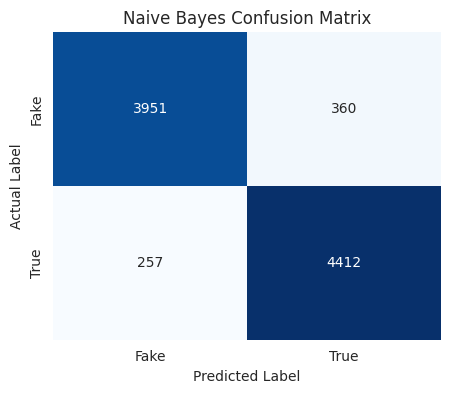

In [26]:
plot_conf_matrix(y_test, nb_pred, "Naive Bayes Confusion Matrix")

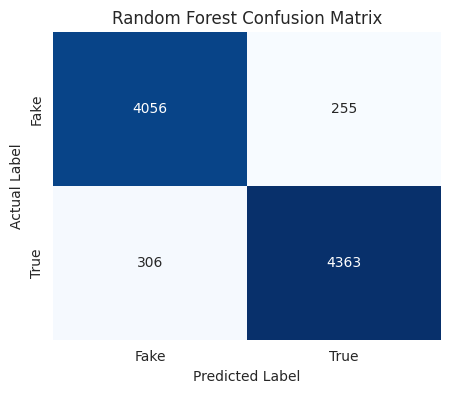

In [27]:
plot_conf_matrix(y_test, rf_pred, "Random Forest Confusion Matrix")

Text(0.5, 0, 'Machine Learning Models')

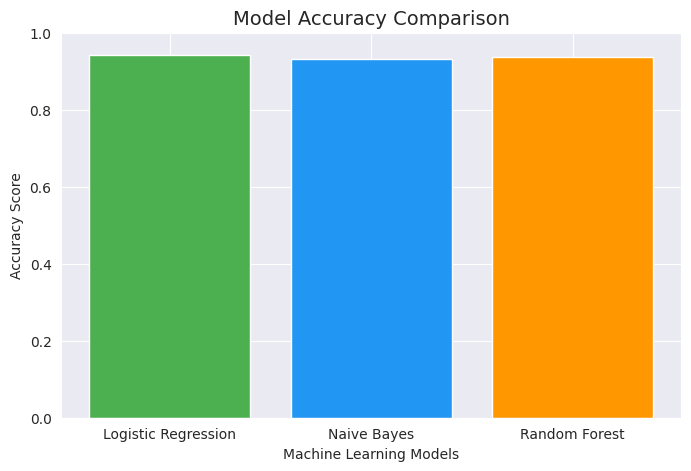

In [28]:
accuracies = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, rf_pred)
]

models = ['Logistic Regression', 'Naive Bayes', 'Random Forest']

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['#4CAF50','#2196F3','#FF9800'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy Score")
plt.xlabel("Machine Learning Models")

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def clean_text(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    return ' '.join(review)

In [30]:
def predict_news(text):
    review = clean_text(text)

    text_tfidf = tfidf.transform([review])

    prediction = rf_model.predict(text_tfidf)

    if prediction[0] == 0:
        print("📰 The news is **REAL** ✅")
    else:
        print("🗞️ The news is **FAKE** ❌")

In [31]:
sample_news = input("Enter a news headline or short article: ")
predict_news(sample_news)

Enter a news headline or short article: Margaret Brennan and John Dickerson of CBS News claimed that “the president of the United States has nothing to do with the price of bacon,” “or eggs,” “or gas,” “or any of it.”  In fact, presidents impact the prices of virtually everything through federal deficits that spur inflation, regulations that prohibit the use of cost-effective production methods and resources, price and wage controls, trade deals, tariffs, and more.
🗞️ The news is **FAKE** ❌
